In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
target = iris.target
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = target
df = df.drop(['sepal width (cm)', 'petal width (cm)'], 1)
df

,sepal length (cm),petal length (cm),label
0,5.1,1.4,0
1,4.9,1.4,0
2,4.7,1.3,0
3,4.6,1.5,0
4,5.0,1.4,0
...,...,...,...
145,6.7,5.2,2
146,6.3,5.0,2
147,6.5,5.2,2
148,6.2,5.4,2


## Practice exercise
 * Download employee retention dataset from [here](https://www.kaggle.com/giripujar/hr-analytics.)
 * Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
 * Plot bar charts showing impact of employee salaries on retention
 * Plot bar charts showing corelation between department and employee retention
 * Now build logistic regression model using variables that were narrowed down in step 1
 * Measure the accuracy of the model

In [2]:
from sklearn.datasets import load_boston

In [4]:
X, y = load_boston(return_X_y=True)

In [7]:
from sklearn.neighbors import KNeighborsRegressor
mod = KNeighborsRegressor()
#mod = LinearRegression()

In [8]:
mod.fit(X, y)

KNeighborsRegressor()

In [11]:
pred = mod.predict(X)

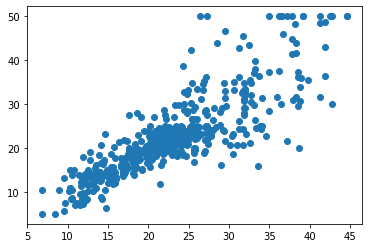

In [15]:
import matplotlib.pyplot as plt
plt.scatter(pred, y);

In [22]:
from sklearn import preprocessing
from sklearn.pipeline import Pipeline

In [24]:
pipe  = Pipeline([
    ('scale', preprocessing.StandardScaler()),
    ('model', KNeighborsRegressor())
])

In [25]:
pipe.fit(X, y)

Pipeline(steps=[('scale', StandardScaler()), ('model', KNeighborsRegressor())])

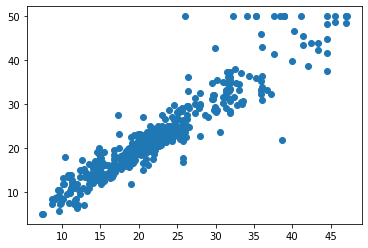

In [26]:
pred = pipe.predict(X)
plt.scatter(pred, y)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()), ('model', KNeighborsRegressor())],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 5,
 'model__p': 2,
 'model__weights': 'uniform'}

In [30]:
model = GridSearchCV(estimator=pipe, param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, cv=3)

In [31]:
model.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [33]:
model.cv_results_

{'mean_fit_time': array([0.00363326, 0.00166281, 0.00199707, 0.00131512, 0.00132982,
        0.00099357, 0.00132966, 0.00132712, 0.00132982, 0.0009981 ]),
 'std_fit_time': array([1.22873724e-03, 4.70246438e-04, 8.16438918e-04, 4.76663717e-04,
        4.71257962e-04, 3.68248453e-05, 4.70527668e-04, 4.66593721e-04,
        4.70921431e-04, 3.62256787e-05]),
 'mean_score_time': array([0.00265932, 0.00265964, 0.00232275, 0.0023423 , 0.00166337,
        0.00199636, 0.00231194, 0.00199469, 0.00197339, 0.00200844]),
 'std_score_time': array([4.47135850e-04, 4.70752452e-04, 9.13132582e-04, 4.91886067e-04,
        4.70978200e-04, 3.65013230e-05, 4.49453993e-04, 9.60274217e-07,
        1.50045938e-05, 2.22748121e-05]),
 'param_model__n_neighbors': masked_array(data=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'params': [{'model__n_neighbors': 1},


In [34]:
import pandas as pd
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003633,0.001229,0.002659,4.471359e-04,1,{'model__n_neighbors': 1},0.226933,0.432998,0.127635,0.262522,0.127179,10
1,0.001663,0.000470,0.002660,4.707525e-04,2,{'model__n_neighbors': 2},0.358216,0.409229,0.172294,0.313246,0.101821,9
2,0.001997,0.000816,0.002323,9.131326e-04,3,{'model__n_neighbors': 3},0.413515,0.476651,0.318534,0.402900,0.064986,1
3,0.001315,0.000477,0.002342,4.918861e-04,4,{'model__n_neighbors': 4},0.475349,0.402495,0.273014,0.383619,0.083675,7
4,0.001330,0.000471,0.001663,4.709782e-04,5,{'model__n_neighbors': 5},0.512318,0.347951,0.262590,0.374286,0.103638,8
5,0.000994,0.000037,0.001996,3.650132e-05,6,{'model__n_neighbors': 6},0.533611,0.389504,0.248482,0.390532,0.116406,6
6,0.001330,0.000471,0.002312,4.494540e-04,7,{'model__n_neighbors': 7},0.544782,0.385199,0.243668,0.391216,0.123003,5
7,0.001327,0.000467,0.001995,9.602742e-07,8,{'model__n_neighbors': 8},0.589644,0.394650,0.209714,0.398003,0.155124,2
8,0.001330,0.000471,0.001973,1.500459e-05,9,{'model__n_neighbors': 9},0.590352,0.407556,0.185253,0.394387,0.165643,3
9,0.000998,0.000036,0.002008,2.227481e-05,10,{'model__n_neighbors': 10},0.616510,0.395077,0.164023,0.391870,0.184741,4


In [55]:
import numpy as np
arr = np.array(['low', 'low', 'high', 'medium'])
arr.shape

(4,)

In [56]:
arr = arr.reshape(-1, 1)

In [57]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
enc = OneHotEncoder(sparse=False, handle_unknown='ignore')
enc.fit_transform(arr)

array([[0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])

In [61]:
enc.transform([['zero']])

array([[0., 0., 0.]])

In [85]:
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=2000, n_features=3, n_redundant=0, random_state=21, class_sep=2, flip_y=0.1)

<IPython.core.display.Javascript object>


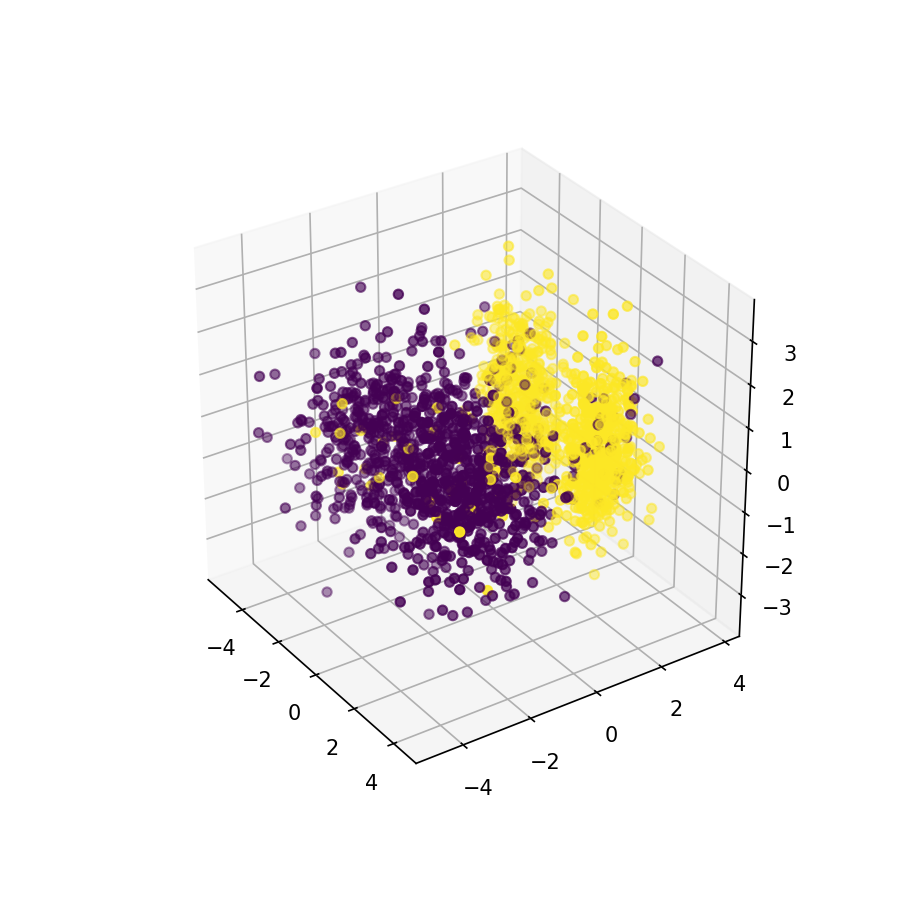

In [90]:
%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:,2], c=y);

C:\Users\Eivanas\AppData\Roaming\Python\Python37\site-packages\matplotlib\collections.py:886: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


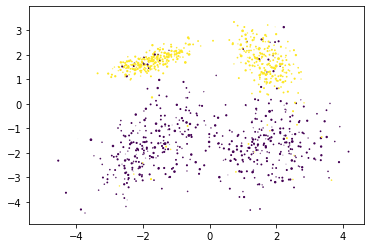

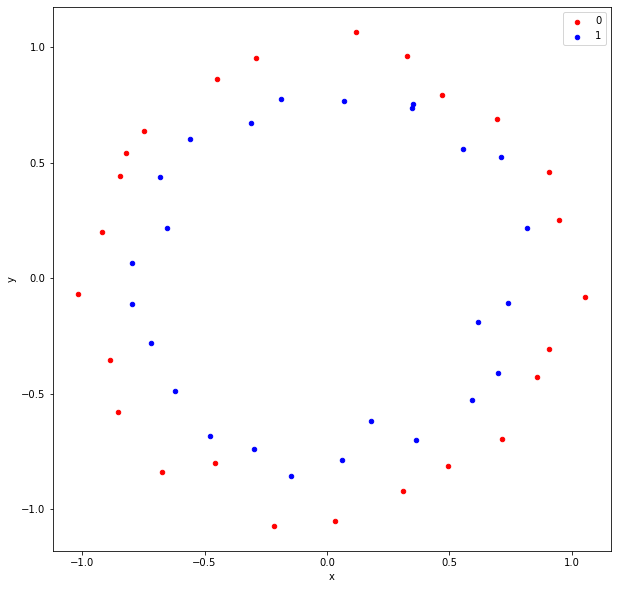

In [1]:
from sklearn.datasets import make_circles

from matplotlib import pyplot
import pandas as pd

X, y = make_circles(n_samples=50, noise=0.05)

df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}


fig, ax = pyplot.subplots(figsize=(10,10))

grouped = df.groupby('label')

for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

In [ ]:
# axes.scatter(data.loc[data['label'] == 1, 'x1'], data.loc[data['label'] == 1, 'x2'], color = 'r', label='1')
# axes.scatter(data.loc[data['label'] == 0, 'x1'], data.loc[data['label'] == 0, 'x2'], color = 'b', label='0')
# axes.legend()
# axes.set_xlim(-1,1.5)
# axes.set_xlim(-1,1.5);

In [7]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

df = pd.read_csv('../data_samples/sms_spam_dataset', delimiter='\t',header=None)
X = df[1]
y = df[0]

X_train, X_test, y_train, y_test = train_test_split(df[1],df[0])

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train)
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
X_test = vectorizer.transform( ['Please call', 'honey, whats up?'] )
predictions = classifier.predict(X_test)
print(predictions)


['spam' 'ham']
